In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.express as px
import plotly.io as pio
import re
import pickle
import os
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, precision_score, roc_auc_score, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv("dataset/train_u6lujuX_CVtuZ9i (1).csv")

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.drop(["Loan_ID"], axis=True, inplace=True)

In [7]:
df.shape

(614, 12)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(614, 12)

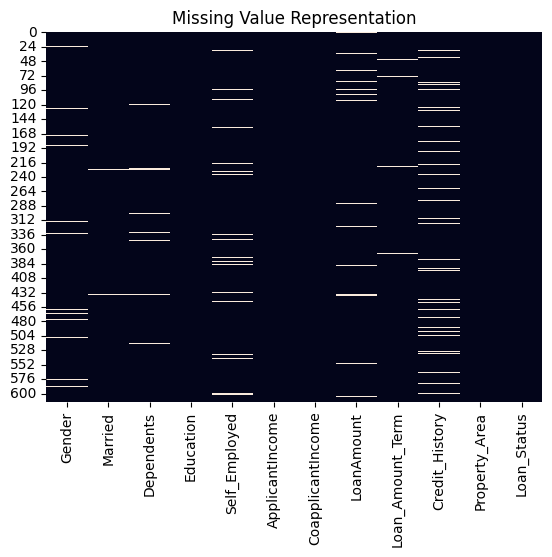

In [10]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Representation")
plt.show()

In [11]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# missing VaImputation: Optimised
# missing VaImputation: Optimised
# missing VaImputation: Optimised

columns_to_impute = ["Gender", "Married", "Dependents", "Self_Employed","Loan_Amount_Term", "Credit_History"]
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

df["LoanAmount"] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[["LoanAmount"]])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('float')
df['Credit_History'] = df['Credit_History'].astype('float')

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [13]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [15]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

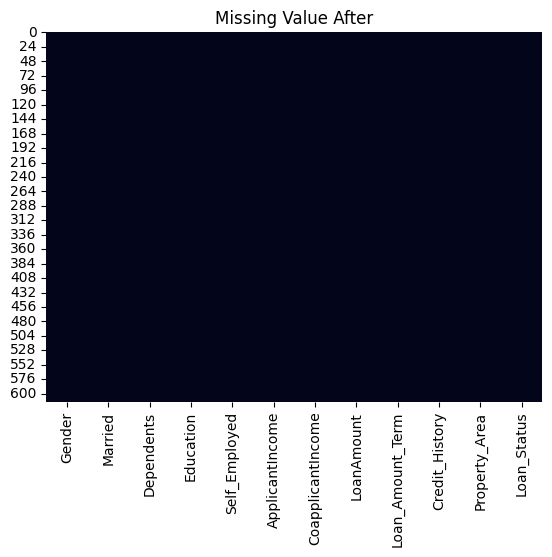

In [16]:

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value After")
plt.show()

In [17]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [18]:
fig = px.pie(df,names='Loan_Status', hole=0.3)

fig.update_layout(title="Percentage Share of Loan_Status",
                  height=500,
                  width = 500,
                  paper_bgcolor = "rgba(0,0,0,0)",
                  plot_bgcolor = "rgba(0,0,0,0)",

        #annotations = [dict(text="Class".title(), showarrow=False)],
        margin_autoexpand=True,

        legend=dict(yanchor="bottom",
                                  y=-0.3,
                                  xanchor="center",
                                  x=0.5,
                                  orientation='h'),
        autosize=True)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
list(df.columns)

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

# Chi2 Test

In [ ]:
non_categorical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categorical_features = []
for col in df.columns:
    if col not in non_categorical_features:
        categorical_features.append(col)

categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import os
####################################################

#categorical_features.append("Class")

#####################################################
alpha= 0.01
CI = 0.99
outputs = []

#################### CLEANING THE FILE ################################
#try:
#    with open('../RawData_EDA_Report/Chi2Test/Chi2Test_for_associaion.html', 'w') as file:
#        file.write('')
#except:
#    pass
######################################################


for col in df[categorical_features].drop(['Loan_Status'],axis=1).columns:

    observed_freq = pd.crosstab(df[categorical_features]['Loan_Status'],df[categorical_features][col])
    chi2_stat, p_value, dof,expected_freq = chi2_contingency(observed = observed_freq,correction=True)
    critical_value=chi2.ppf(q=1-alpha,df=dof)
    
    if chi2_stat>=critical_value:
        print(f"Reject H0 at CI {CI}, p-value {round(p_value,4)}, critical value {round(critical_value,4)} and chi2_stat {round(chi2_stat,4)}:\nThere is a relationship between {'Classes'.upper()} and {col.upper()} variables \n")
        output = f"<ul> Reject H0 at CI {CI}, p-value {round(p_value,4)}, critical value {round(critical_value,4)} and chi2_stat {round(chi2_stat,4)}:\nThere is a relationship between {'Classes'.upper()} and {col.upper()} variables</ul> \n"
    else:
        print(f"Retain H0 at CI {CI}, p-value {round(p_value,4)} and critical value {round(critical_value,4)} and chi2_stat {round(chi2_stat,4)}:\nThere is no relationship between {'Classes'.upper()} and {col.upper()} variables \n")
        output = f"<ul>Retain H0 at CI {CI}, p-value {round(p_value,4)} and critical value {round(critical_value,4)} and chi2_stat {round(chi2_stat,4)}:\nThere is no relationship between {'Classes'.upper()} and {col.upper()} variables</ul> \n"
    
    outputs.append(output)

# Write the outputs to the file

#if not os.path.exists(f'../RawData_EDA_Report/9_1_Chi2Test'):
#    os.makedirs(f'../RawData_EDA_Report/9_1_Chi2Test')
    
#with open('../RawData_EDA_Report/9_1_Chi2Test/9_1_Chi2Test_for_associaion.html','a') as file:
#    file.write("<h1>Chi2 Test for Association/ Independence Detection</h1><uol>")
#    for output in outputs:
#        file.write(f"<p  style='text-align: justify; margin-left=50px'>{output}</uol>\n</p>")

    

Retain H0 at CI 0.99, p-value 0.7391 and critical value 6.6349 and chi2_stat 0.1109:
There is no relationship between CLASSES and GENDER variables 

Retain H0 at CI 0.99, p-value 0.0296 and critical value 6.6349 and chi2_stat 4.7319:
There is no relationship between CLASSES and MARRIED variables 

Retain H0 at CI 0.99, p-value 0.3689 and critical value 11.3449 and chi2_stat 3.1514:
There is no relationship between CLASSES and DEPENDENTS variables 

Retain H0 at CI 0.99, p-value 0.0431 and critical value 6.6349 and chi2_stat 4.0915:
There is no relationship between CLASSES and EDUCATION variables 

Retain H0 at CI 0.99, p-value 1.0 and critical value 6.6349 and chi2_stat 0.0:
There is no relationship between CLASSES and SELF_EMPLOYED variables 

Retain H0 at CI 0.99, p-value 0.1306 and critical value 21.666 and chi2_stat 13.7743:
There is no relationship between CLASSES and LOAN_AMOUNT_TERM variables 

Reject H0 at CI 0.99, p-value 0.0, critical value 6.6349 and chi2_stat 176.1146:
Ther

# Handling  Categoricl Features

In [ ]:
#df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('float')

#column_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',  'Credit_History', 'Property_Area', 'Loan_Status']

df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [ ]:
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.express as px
import plotly.io as pio
import pandas as pd


# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 2

# Create a subplot grid with the specified number of rows and columns
fig = sp.make_subplots(rows=num_rows, cols=num_cols,subplot_titles=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

# Loop through each column in the dataframe and add a box plot to the subplot grid
for idx, col_name in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']):
    row_num = (idx // num_cols) + 1
    col_num = (idx % num_cols) + 1
    fig.add_trace(px.box(df[col_name]).data[0], row=row_num, col=col_num,)

    # Set the title of the subplot grid
    fig.update_layout(height=500,width=1100, title='Before Handling Outliers and After Missing Value Imputation',
                      paper_bgcolor = "rgba(0,0,0,0)",
                      plot_bgcolor = "rgba(0,0,0,0)",                  
                     )
    fig.update_traces(marker_color='green')
# Show the plot

###############################
fig.update_yaxes(showline=False,showgrid=False)
fig.update_xaxes(showline=False,showgrid=False)
fig.show()
##########################################
#pio.write_html(fig,file = '../RawData_EDA_Report/6.html')

# Outlier Handling

In [ ]:
def outliers_fence(col):
    Q1 = df[col].quantile(q=0.25)
    Q3 = df[col].quantile(q=0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR
    return lower_fence, upper_fence

columns_to_winsorize = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
for col in columns_to_winsorize:
    lower_fence, upper_fence = outliers_fence(col)
    df[col] = np.where(df[col] < lower_fence, lower_fence, df[col])
    df[col] = np.where(df[col] > upper_fence, upper_fence, df[col])


In [ ]:


# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 2

# Create a subplot grid with the specified number of rows and columns
fig = sp.make_subplots(rows=num_rows, cols=num_cols,subplot_titles=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

# Loop through each column in the dataframe and add a box plot to the subplot grid
for idx, col_name in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']):
    row_num = (idx // num_cols) + 1
    col_num = (idx % num_cols) + 1
    fig.add_trace(px.box(df[col_name]).data[0], row=row_num, col=col_num,)

    # Set the title of the subplot grid
    fig.update_layout(height=500,width=1100, title='After Handling Outliers and After Missing Value Imputation',
                      paper_bgcolor = "rgba(0,0,0,0)",
                      plot_bgcolor = "rgba(0,0,0,0)",                  
                     )
    fig.update_traces(marker_color='green')
# Show the plot

###############################
fig.update_yaxes(showline=False,showgrid=False)
fig.update_xaxes(showline=False,showgrid=False)
fig.show()
##########################################
#pio.write_html(fig,file = '../RawData_EDA_Report/6.html')

# KDE Plot

C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_15888\362128703.py:19: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



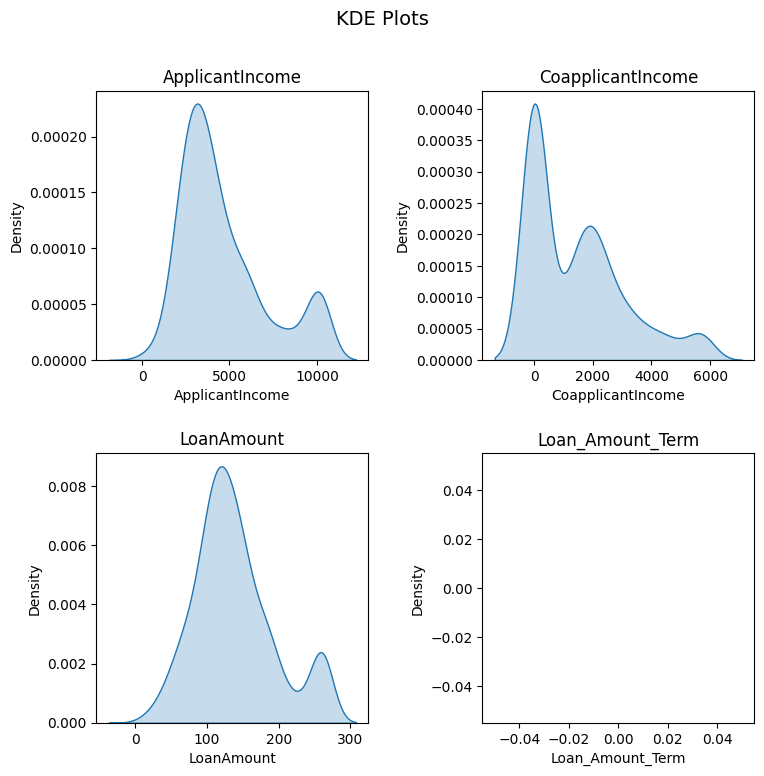

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

col1 = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
#col2 = [ 'I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych']

# generate a sample dataframe
df1 = df[col1]

# create figure and axes objects
fig, axes = plt.subplots(nrows=2, ncols=2, squeeze=True,figsize=(8, 8))

# flatten the axes array for easy indexing
axes = axes.flatten()

# loop through each column and plot the kde on a separate axis
for i, col in enumerate(df1.columns):
    sns.kdeplot(df1[col], ax=axes[i], fill=True)
    axes[i].set_title(col)

# remove any unused axes and add a main title
for i in range(len(df1.columns), len(axes)):
    fig.delaxes(axes[i])
fig.suptitle('KDE Plots', fontsize=14)

# adjust the spacing between the subplots and show the figure
fig.tight_layout(pad=2)
plt.show()

#############################################
#fig.figure.savefig('../RawData_EDA_Report/5.svg',transparent=True,dpi=300)


# Feature Scaling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer

In [20]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


In [21]:
non_categorical_features

NameError: name 'non_categorical_features' is not defined

In [22]:
X = df.drop(['Loan_Status_Y'], axis=1)
y = df['Loan_Status_Y']

KeyError: "['Loan_Status_Y'] not found in axis"

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2023)

In [ ]:
X_train_dropped = X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
X_test_dropped = X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

In [ ]:
fitted_scaler = StandardScaler().fit(X_train_dropped)

#fitted_scaler = Normalizer().fit(X_train_dropped)


X_train_scaled = fitted_scaler.transform(X_train_dropped)
X_test_scaled = fitted_scaler.transform(X_test_dropped)

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

In [ ]:
X_train_scaled_final  = pd.concat([X_train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1).reset_index(drop=True), X_train_scaled_df],axis=1)
X_test_scaled_final  = pd.concat([X_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1).reset_index(drop=True), X_test_scaled_df],axis=1)



# Training

### Drift Report

In [58]:
from evidently import ColumnMapping
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset
from evidently.metrics import *
from evidently.tests import *



########### NEW METHOD ###############
train_df, test_df = X_train_scaled_final, X_test_scaled_final
report = Report(metrics=[ DataDriftPreset(),])
report.run(reference_data=train_df, current_data=test_df)

########### SAVING JSON FILE ########




os.makedirs("artifact/drift_report", exist_ok=True)
report.save_html(filename= "artifact/drift_report/report_page_file_path.html")
report.save_json(filename= "artifact/drift_report/report_page_file_path.json")

In [32]:
X_train_scaled_final.head()

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.0,1,1,0,1,0,0,0,0,0,-0.530557,0.142936,0.186824,0.0
1,1.0,1,1,0,1,0,0,0,1,0,-0.308624,-0.871696,-0.876293,0.0
2,0.0,1,1,0,0,0,1,0,1,0,-1.193184,1.436444,1.090475,0.0
3,1.0,1,1,0,0,0,0,0,1,0,0.071832,-0.379214,-0.256141,0.0
4,0.0,1,0,0,0,0,0,0,0,0,0.635779,1.748547,1.232224,0.0


In [33]:
lr = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
adaBoost = AdaBoostClassifier()
#lgbm = LGBMClassifier()
#gbt = GradientBoostingClassifier()

In [34]:
clfs = {
    'LogisticRegression': lr,
    'SVC': svc,
    'KNeighbors': knn,
    'RandomForest': rf,
    'AdaBoost': adaBoost,
    
   #'GradientBoostingTrees': gbt
}

In [35]:
param_grid = {
    
    'LogisticRegression':{'penalty':['elasticnet'],
                          'solver':['saga'],
                          'max_iter':[5000],
                          'l1_ratio':[1,0.8,0.6,0.5,0.4,0.2,0],                          
                          'C': [10e-2,10e-1,1.0],
                         'class_weight': ['balanced',None]},
    
    
    'SVC': {'C':[10e-2,10e-1,1.0],
          'kernel':['linear','rbf','sigmoid'],
           'gamma':['auto']},
    
    'KNeighbors': {'n_neighbors':[3,6,9,11,13],  # n_neighbors should always be odd numbers
                     'weights': ['uniform','distance']},
    
    'RandomForest': {'n_estimators':[500],
                   'criterion':['gini','log_loss'],
                   'max_depth':[2,4,5,6,8,10,15,20],
                   'class_weight': ['balanced',None]},
    
    'AdaBoost': {'n_estimators': [50,60,70,90,100,110],
                'learning_rate': [10e-3,10e-2,10e-1,1.0]},
    
    #'GradientBoostingTrees': {'loss': ['log_loss', 'exponential'],
    #                         'learning_rate': [10e-3,10e-2,10e-1,1.0],
    #                         'n_estimators': [100,200,250],
    #                         'max_depth': [2,3,4,5,6,7,8,9]},
    
           
    }

In [36]:
def train_classifier(clf,parameters):
    
    gs = GridSearchCV(clf,param_grid=parameters, cv=5,refit='roc_auc_ovr_weighted', verbose=3, scoring=['f1_weighted','roc_auc_ovr_weighted','balanced_accuracy']).fit(X_train, y_train)
    #y_pred = gs.predict(X_test)    
    
    
    return gs

In [37]:
tuned_models = []

for name,clf in clfs.items():
    
    print("\nFor ",name)
    parameters = param_grid[name]
    current_best_model = train_classifier(clf,parameters)
    
    ####### Saving Trainined MOdel #####################
    
    # create the directory if it does not exist
    if not os.path.exists('artifact/models'):
        os.makedirs('artifact/models')

    filename = 'tuned_' + re.search(r'^[^\(]+', str(current_best_model.best_estimator_))[0] + '_model.pkl'
    filepath = os.path.join('artifact/models', filename)
    with open(filepath, 'wb') as file:
        pickle.dump(current_best_model, file)
            
    ##############################################################################
    
    tuned_models.append(current_best_model)


For  LogisticRegression
Fitting 5 folds for each of 42 candidates, totalling 210 fits


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=0.1, class_weight=balanced, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   1.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=0.1, class_weight=balanced, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.590) total time=   1.0s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=0.1, class_weight=balanced, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.500) total time=   0.9s
[CV 4/5] END C=0.1, class_weight=balanced, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.456) f1_weighted: (test=0.488) roc_auc_ovr_weighted: (test=0.470) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=0.1, class_weight=balanced, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   1.1s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=0.1, class_weight=balanced, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=0.1, class_weight=balanced, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.591) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=0.1, class_weight=balanced, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.500) total time=   1.3s
[CV 4/5] END C=0.1, class_weight=balanced, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.456) f1_weighted: (test=0.488) roc_auc_ovr_weighted: (test=0.470) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=0.1, class_weight=balanced, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=0.1, class_weight=balanced, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.6s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=0.1, class_weight=balanced, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.591) total time=   1.0s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=0.1, class_weight=balanced, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.500) total time=   1.0s
[CV 4/5] END C=0.1, class_weight=balanced, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.456) f1_weighted: (test=0.488) roc_auc_ovr_weighted: (test=0.470) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=0.1, class_weight=balanced, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=0.1, class_weight=balanced, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=0.1, class_weight=balanced, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.591) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=0.1, class_weight=balanced, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.500) total time=   0.8s
[CV 4/5] END C=0.1, class_weight=balanced, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.456) f1_weighted: (test=0.488) roc_auc_ovr_weighted: (test=0.470) total time=   0.1s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=0.1, class_weight=balanced, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=0.1, class_weight=balanced, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=0.1, class_weight=balanced, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.592) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=0.1, class_weight=balanced, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.500) total time=   0.9s
[CV 4/5] END C=0.1, class_weight=balanced, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.456) f1_weighted: (test=0.488) roc_auc_ovr_weighted: (test=0.470) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=0.1, class_weight=balanced, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=0.1, class_weight=balanced, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=0.1, class_weight=balanced, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.592) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=0.1, class_weight=balanced, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.500) total time=   0.7s
[CV 4/5] END C=0.1, class_weight=balanced, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.456) f1_weighted: (test=0.488) roc_auc_ovr_weighted: (test=0.472) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=0.1, class_weight=balanced, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=0.1, class_weight=balanced, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=0.1, class_weight=balanced, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.591) total time=   0.5s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=0.1, class_weight=balanced, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.501) total time=   0.5s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END C=0.1, class_weight=balanced, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.463) f1_weighted: (test=0.497) roc_auc_ovr_weighted: (test=0.474) total time=   0.5s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=0.1, class_weight=balanced, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.5s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=0.1, class_weight=None, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.611) total time=   0.7s
[CV 2/5] END C=0.1, class_weight=None, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.587) total time=   0.2s
[CV 3/5] END C=0.1, class_weight=None, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.504) total time=   0.2s
[CV 4/5] END C=0.1, class_weight=None, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.3s
[CV 5/5] END C=0.1, class_weight=None, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568)

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=0.1, class_weight=None, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.611) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=0.1, class_weight=None, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.590) total time=   0.8s
[CV 3/5] END C=0.1, class_weight=None, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.504) total time=   0.2s
[CV 4/5] END C=0.1, class_weight=None, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.2s
[CV 5/5] END C=0.1, class_weight=None, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.550) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=0.1, class_weight=None, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.611) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=0.1, class_weight=None, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.590) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=0.1, class_weight=None, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.506) total time=   0.7s
[CV 4/5] END C=0.1, class_weight=None, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.2s
[CV 5/5] END C=0.1, class_weight=None, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.553) total time=   0.3s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=0.1, class_weight=None, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=0.1, class_weight=None, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.591) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=0.1, class_weight=None, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   0.7s
[CV 4/5] END C=0.1, class_weight=None, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=0.1, class_weight=None, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.553) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=0.1, class_weight=None, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=0.1, class_weight=None, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.591) total time=   1.0s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=0.1, class_weight=None, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.508) total time=   0.7s
[CV 4/5] END C=0.1, class_weight=None, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=0.1, class_weight=None, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.553) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=0.1, class_weight=None, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=0.1, class_weight=None, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=0.1, class_weight=None, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.508) total time=   0.8s
[CV 4/5] END C=0.1, class_weight=None, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=0.1, class_weight=None, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=0.1, class_weight=None, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.5s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=0.1, class_weight=None, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.5s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=0.1, class_weight=None, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   0.7s
[CV 4/5] END C=0.1, class_weight=None, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.1s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=0.1, class_weight=None, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=balanced, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   1.1s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=balanced, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.592) total time=   1.1s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=balanced, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.501) total time=   1.0s
[CV 4/5] END C=1.0, class_weight=balanced, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.456) f1_weighted: (test=0.488) roc_auc_ovr_weighted: (test=0.473) total time=   0.5s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=balanced, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   1.3s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=balanced, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=balanced, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.592) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=balanced, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.501) total time=   0.8s
[CV 4/5] END C=1.0, class_weight=balanced, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.456) f1_weighted: (test=0.488) roc_auc_ovr_weighted: (test=0.473) total time=   0.5s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=balanced, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=balanced, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=balanced, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.592) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=balanced, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.501) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END C=1.0, class_weight=balanced, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.463) f1_weighted: (test=0.497) roc_auc_ovr_weighted: (test=0.474) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=balanced, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=balanced, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=balanced, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.591) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=balanced, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.501) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END C=1.0, class_weight=balanced, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.463) f1_weighted: (test=0.497) roc_auc_ovr_weighted: (test=0.474) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=balanced, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=balanced, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=balanced, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.591) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=balanced, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.501) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END C=1.0, class_weight=balanced, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.463) f1_weighted: (test=0.497) roc_auc_ovr_weighted: (test=0.474) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=balanced, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=balanced, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=balanced, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.591) total time=   1.0s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=balanced, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.501) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END C=1.0, class_weight=balanced, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.463) f1_weighted: (test=0.497) roc_auc_ovr_weighted: (test=0.474) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=balanced, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=balanced, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.5s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=balanced, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.591) total time=   0.5s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=balanced, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.501) total time=   0.6s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END C=1.0, class_weight=balanced, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.463) f1_weighted: (test=0.497) roc_auc_ovr_weighted: (test=0.474) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=balanced, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.6s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=None, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=None, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=None, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   0.7s
[CV 4/5] END C=1.0, class_weight=None, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=None, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=None, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=None, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=None, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   0.7s
[CV 4/5] END C=1.0, class_weight=None, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=None, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=None, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   1.0s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=None, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=None, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   0.8s
[CV 4/5] END C=1.0, class_weight=None, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=None, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=None, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=None, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=None, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   0.7s
[CV 4/5] END C=1.0, class_weight=None, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=None, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=None, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=None, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=None, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   0.8s
[CV 4/5] END C=1.0, class_weight=None, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.3s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=None, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   1.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=None, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=None, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=None, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   0.8s
[CV 4/5] END C=1.0, class_weight=None, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.3s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=None, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=None, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=None, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.6s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=None, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   0.6s
[CV 4/5] END C=1.0, class_weight=None, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.1s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=None, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   0.5s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=balanced, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=balanced, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.592) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=balanced, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.501) total time=   0.8s
[CV 4/5] END C=1.0, class_weight=balanced, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.456) f1_weighted: (test=0.488) roc_auc_ovr_weighted: (test=0.473) total time=   0.3s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=balanced, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=balanced, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=balanced, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.592) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=balanced, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.501) total time=   0.9s
[CV 4/5] END C=1.0, class_weight=balanced, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.456) f1_weighted: (test=0.488) roc_auc_ovr_weighted: (test=0.473) total time=   0.5s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=balanced, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=balanced, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   1.1s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=balanced, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.592) total time=   1.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=balanced, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.501) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END C=1.0, class_weight=balanced, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.463) f1_weighted: (test=0.497) roc_auc_ovr_weighted: (test=0.474) total time=   1.3s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=balanced, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   1.1s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=balanced, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=balanced, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.591) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=balanced, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.501) total time=   1.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END C=1.0, class_weight=balanced, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.463) f1_weighted: (test=0.497) roc_auc_ovr_weighted: (test=0.474) total time=   1.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=balanced, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=balanced, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=balanced, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.591) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=balanced, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.501) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END C=1.0, class_weight=balanced, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.463) f1_weighted: (test=0.497) roc_auc_ovr_weighted: (test=0.474) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=balanced, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=balanced, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=balanced, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.591) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=balanced, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.501) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END C=1.0, class_weight=balanced, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.463) f1_weighted: (test=0.497) roc_auc_ovr_weighted: (test=0.474) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=balanced, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=balanced, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.595) f1_weighted: (test=0.591) roc_auc_ovr_weighted: (test=0.612) total time=   0.6s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=balanced, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.531) f1_weighted: (test=0.580) roc_auc_ovr_weighted: (test=0.591) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=balanced, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.478) f1_weighted: (test=0.516) roc_auc_ovr_weighted: (test=0.501) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 4/5] END C=1.0, class_weight=balanced, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.463) f1_weighted: (test=0.497) roc_auc_ovr_weighted: (test=0.474) total time=   0.6s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=balanced, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.543) f1_weighted: (test=0.538) roc_auc_ovr_weighted: (test=0.552) total time=   0.6s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=None, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=None, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=None, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   0.8s
[CV 4/5] END C=1.0, class_weight=None, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=None, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=None, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=None, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=None, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   0.8s
[CV 4/5] END C=1.0, class_weight=None, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=None, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=None, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=None, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=None, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   0.9s
[CV 4/5] END C=1.0, class_weight=None, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=None, l1_ratio=0.6, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   0.7s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=None, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=None, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=None, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   0.8s
[CV 4/5] END C=1.0, class_weight=None, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=None, l1_ratio=0.5, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=None, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=None, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=None, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   0.8s
[CV 4/5] END C=1.0, class_weight=None, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.2s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=None, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=None, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.9s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=None, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=None, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   1.2s
[CV 4/5] END C=1.0, class_weight=None, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.4s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=None, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   0.8s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 1/5] END C=1.0, class_weight=None, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.559) roc_auc_ovr_weighted: (test=0.612) total time=   0.6s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 2/5] END C=1.0, class_weight=None, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.592) total time=   0.5s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 3/5] END C=1.0, class_weight=None, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.507) total time=   0.6s
[CV 4/5] END C=1.0, class_weight=None, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.555) roc_auc_ovr_weighted: (test=0.469) total time=   0.1s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[CV 5/5] END C=1.0, class_weight=None, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; balanced_accuracy: (test=0.500) f1_weighted: (test=0.568) roc_auc_ovr_weighted: (test=0.552) total time=   0.6s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge




For  SVC
Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 1/5] END C=0.1, gamma=auto, kernel=linear; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time= 1.5min


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 2/5] END C=0.1, gamma=auto, kernel=linear; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=  56.1s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 3/5] END C=0.1, gamma=auto, kernel=linear; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time= 1.5min


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 4/5] END C=0.1, gamma=auto, kernel=linear; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time= 1.2min


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 5/5] END C=0.1, gamma=auto, kernel=linear; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time= 2.1min
[CV 1/5] END C=0.1, gamma=auto, kernel=rbf; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 2/5] END C=0.1, gamma=auto, kernel=rbf; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 3/5] END C=0.1, gamma=auto, kernel=rbf; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 4/5] END C=0.1, gamma=auto, kernel=rbf; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 5/5] END C=0.1, gamma=auto, kernel=rbf; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 1/5] END C=0.1, gamma=auto, kernel=sigmoid; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 2/5] END C=0.1, gamma=auto, kernel=sigmoid; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 3/5] END C=0.1, gamma=auto, kernel=sigmoid; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 4/5] END C=0.1, gamma=auto, kernel=sigmoid; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 5/5] END C=0.1, gamma=auto, kernel=sigmoid; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 1/5] END C=1.0, gamma=auto, kernel=linear; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time= 1.2min


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 2/5] END C=1.0, gamma=auto, kernel=linear; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time= 1.1min


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 3/5] END C=1.0, gamma=auto, kernel=linear; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time= 2.1min


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 4/5] END C=1.0, gamma=auto, kernel=linear; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time= 1.7min


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 5/5] END C=1.0, gamma=auto, kernel=linear; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time= 2.0min
[CV 1/5] END C=1.0, gamma=auto, kernel=rbf; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 2/5] END C=1.0, gamma=auto, kernel=rbf; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 3/5] END C=1.0, gamma=auto, kernel=rbf; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 4/5] END C=1.0, gamma=auto, kernel=rbf; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 5/5] END C=1.0, gamma=auto, kernel=rbf; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 1/5] END C=1.0, gamma=auto, kernel=sigmoid; balanced_accuracy: (test=nan) f1_weighted: (test=

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 3/5] END C=1.0, gamma=auto, kernel=sigmoid; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 4/5] END C=1.0, gamma=auto, kernel=sigmoid; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 5/5] END C=1.0, gamma=auto, kernel=sigmoid; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 1/5] END C=1.0, gamma=auto, kernel=linear; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time= 1.0min


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 2/5] END C=1.0, gamma=auto, kernel=linear; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time= 1.2min


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 3/5] END C=1.0, gamma=auto, kernel=linear; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time= 2.1min


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 4/5] END C=1.0, gamma=auto, kernel=linear; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time= 1.6min


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 5/5] END C=1.0, gamma=auto, kernel=linear; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time= 2.3min
[CV 1/5] END C=1.0, gamma=auto, kernel=rbf; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 2/5] END C=1.0, gamma=auto, kernel=rbf; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 3/5] END C=1.0, gamma=auto, kernel=rbf; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 4/5] END C=1.0, gamma=auto, kernel=rbf; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 5/5] END C=1.0, gamma=auto, kernel=rbf; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s


C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 74, in _cached_call
    return cache[method]
KeyError: 'predict_proba'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HIMANSHU\AppData\Loc

[CV 1/5] END C=1.0, gamma=auto, kernel=sigmoid; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 2/5] END C=1.0, gamma=auto, kernel=sigmoid; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 3/5] END C=1.0, gamma=auto, kernel=sigmoid; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 4/5] END C=1.0, gamma=auto, kernel=sigmoid; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 5/5] END C=1.0, gamma=auto, kernel=sigmoid; balanced_accuracy: (test=nan) f1_weighted: (test=nan) roc_auc_ovr_weighted: (test=nan) total time=   0.0s

For  KNeighbors
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END n_neighbors=3, weights=uniform; balanced_accuracy: (test=0.475) f1_weighted: (test=0.560) roc_auc_ovr_weighted: (test=0.565) total time=   

# Model Import & Model Scores

In [ ]:
svm_model = pickle.load(open('artifact/models//tuned_SVC_model.pkl','rb'))
AdaBoost_model = pickle.load(open('artifact/models/tuned_AdaBoostClassifier_model.pkl','rb'))
knn_model = pickle.load(open('artifact/models/tuned_KNeighborsClassifier_model.pkl','rb'))
lr_model = pickle.load(open('artifact/models/tuned_LogisticRegression_model.pkl','rb'))
RF_model = pickle.load(open('artifact/models/tuned_RandomForestClassifier_model.pkl','rb'))


NameError: name 'pickle' is not defined

In [ ]:
svm_model.best_estimator_

SVC(C=0.1, gamma='auto', kernel='linear')

In [41]:
model_scores = pd.DataFrame({
    'model': ['SVM','KNN','AdaBoost','RF','LR'],
    'balanced_accuracy_train': [balanced_accuracy_score(y_train,svm_model.best_estimator_.predict(X_train)),
                                balanced_accuracy_score(y_train,knn_model.best_estimator_.predict(X_train)),
                                balanced_accuracy_score(y_train,AdaBoost_model.best_estimator_.predict(X_train)),
                               
                                balanced_accuracy_score(y_train,RF_model.best_estimator_.predict(X_train)),
                                balanced_accuracy_score(y_train,lr_model.best_estimator_.predict(X_train)),
                               
                               ]})


balanced_accuracy_test =  [balanced_accuracy_score(y_test,svm_model.best_estimator_.predict(X_test)),
                           balanced_accuracy_score(y_test,knn_model.best_estimator_.predict(X_test)),
                           balanced_accuracy_score(y_test,AdaBoost_model.best_estimator_.predict(X_test)),
                          
                           balanced_accuracy_score(y_test,RF_model.best_estimator_.predict(X_test)),
                           balanced_accuracy_score(y_test,lr_model.best_estimator_.predict(X_test)),                   
                            
                          ] 

f1_score_train = [f1_score(y_train,svm_model.best_estimator_.predict(X_train),average="weighted"),
                  
                  f1_score(y_train,knn_model.best_estimator_.predict(X_train),average="weighted"),
                  f1_score(y_train,AdaBoost_model.best_estimator_.predict(X_train),average="weighted"),
                  
                  f1_score(y_train,RF_model.best_estimator_.predict(X_train),average="weighted"),
                  f1_score(y_train,lr_model.best_estimator_.predict(X_train),average="weighted"),
                  
                 ]


f1_score_test = [f1_score(y_test,svm_model.best_estimator_.predict(X_test),average="weighted"),
                 
                 f1_score(y_test,knn_model.best_estimator_.predict(X_test),average="weighted"),
                 f1_score(y_test,AdaBoost_model.best_estimator_.predict(X_test),average="weighted"),
                 
                 f1_score(y_test,RF_model.best_estimator_.predict(X_test),average="weighted"),
                 f1_score(y_test,lr_model.best_estimator_.predict(X_test),average="weighted"),
                 
                ]

roc_auc_train =  [roc_auc_score(y_train,svm_model.best_estimator_.predict(X_train),  multi_class='ovr', average='weighted'),
                  
                  roc_auc_score(y_train,knn_model.best_estimator_.predict(X_train), multi_class='ovr', average='weighted'),
                  roc_auc_score(y_train,AdaBoost_model.best_estimator_.predict(X_train), multi_class='ovr', average='weighted'),
                  
                  roc_auc_score(y_train,RF_model.best_estimator_.predict(X_train), multi_class='ovr', average='weighted'),
                  roc_auc_score(y_train,lr_model.best_estimator_.predict(X_train), multi_class='ovr', average='weighted'),
                  
                 ]

roc_auc_test = [roc_auc_score(y_test,svm_model.best_estimator_.predict(X_test), multi_class='ovr', average='weighted'),
                
                roc_auc_score(y_test,knn_model.best_estimator_.predict(X_test), multi_class='ovr', average='weighted'),
                roc_auc_score(y_test,AdaBoost_model.best_estimator_.predict(X_test), multi_class='ovr', average='weighted'),
                
                roc_auc_score(y_test,RF_model.best_estimator_.predict(X_test), multi_class='ovr', average='weighted'),
                roc_auc_score(y_test,lr_model.best_estimator_.predict(X_test),  multi_class='ovr', average='weighted'),
                
                ] 

precision_train =  [precision_score(y_train,svm_model.best_estimator_.predict(X_train), zero_division=0, average='weighted'),
                    
                    precision_score(y_train,knn_model.best_estimator_.predict(X_train), zero_division=0, average='weighted'),
                    precision_score(y_train,AdaBoost_model.best_estimator_.predict(X_train), zero_division=0, average='weighted'),
                    
                    precision_score(y_train,RF_model.best_estimator_.predict(X_train), zero_division=0, average='weighted'),
                    precision_score(y_train,lr_model.best_estimator_.predict(X_train), zero_division=0, average='weighted'),
                    
                    
                   ]

precision_test = [precision_score(y_test,svm_model.best_estimator_.predict(X_test), zero_division=0, average='weighted'),
                  
                  precision_score(y_test,knn_model.best_estimator_.predict(X_test), zero_division=0, average='weighted'),
                  precision_score(y_test,AdaBoost_model.best_estimator_.predict(X_test), zero_division=0, average='weighted'),
                  
                  precision_score(y_test,RF_model.best_estimator_.predict(X_test), zero_division=0, average='weighted'),
                  precision_score(y_test,lr_model.best_estimator_.predict(X_test), zero_division=0, average='weighted'),
                  
                 ] 


accuracy_train =  [accuracy_score(y_train,svm_model.best_estimator_.predict(X_train)),
                   
                   accuracy_score(y_train,knn_model.best_estimator_.predict(X_train)),
                   accuracy_score(y_train,AdaBoost_model.best_estimator_.predict(X_train)),
                   
                   accuracy_score(y_train,RF_model.best_estimator_.predict(X_train)),
                   accuracy_score(y_train,lr_model.best_estimator_.predict(X_train)),
                   
                 ]


accuracy_test =  [accuracy_score(y_test,svm_model.best_estimator_.predict(X_test)),
                  accuracy_score(y_test,knn_model.best_estimator_.predict(X_test)),
                  accuracy_score(y_test,AdaBoost_model.best_estimator_.predict(X_test)),
                  
                  accuracy_score(y_test,RF_model.best_estimator_.predict(X_test)),
                  accuracy_score(y_test,lr_model.best_estimator_.predict(X_test)),
                  
                 ] 





best_score= [svm_model.best_score_, knn_model.best_score_, AdaBoost_model.best_score_,
           RF_model.best_score_, lr_model.best_score_]

#################################################################################

model_scores['balanced_accuracy_test'],model_scores['f1_train'],model_scores['f1_test'],model_scores['roc_auc_train'],model_scores['roc_auc_test'],model_scores['precision_train'],model_scores['precision_test'],model_scores['accuracy_train'],model_scores['accuracy_test'] = [balanced_accuracy_test,f1_score_train,f1_score_test,roc_auc_train,roc_auc_test, precision_train,precision_test,accuracy_train,accuracy_test]

model_scores.insert(1,'best_score',best_score)

##############################################################################
os.makedirs('artifact/models/model_scores', exist_ok=True)
model_scores.to_csv('artifact/models/model_scores/model_scores.csv',index=False)

########################

model_scores.style.highlight_max(axis=0)


,model,best_score,balanced_accuracy_train,balanced_accuracy_test,f1_train,f1_test,roc_auc_train,roc_auc_test,precision_train,precision_test,accuracy_train,accuracy_test
0,SVM,nan,0.710393,0.671053,0.787855,0.759960,0.710393,0.671053,0.828836,0.842942,0.810591,0.796748
1,KNN,0.527606,0.539067,0.548142,0.621918,0.633828,0.539067,0.548142,0.637335,0.685843,0.684318,0.707317
2,AdaBoost,0.765217,0.720134,0.671053,0.795965,0.759960,0.720134,0.671053,0.833917,0.842942,0.816701,0.796748
3,RF,0.780710,0.996753,0.671053,0.997962,0.759960,0.996753,0.671053,0.997969,0.842942,0.997963,0.796748
4,LR,0.546600,0.500000,0.500000,0.558699,0.564806,0.500000,0.500000,0.471082,0.477560,0.686354,0.691057


In [42]:
############################################################################################
df  = pd.read_csv('artifact/models//model_scores/model_scores.csv')
#df = df.drop('Unnamed: 0', axis =1)
df = df.set_index('model')
df1 = df[['f1_train','roc_auc_train','balanced_accuracy_train','precision_train','accuracy_train']]
df2 = df[['f1_test','roc_auc_test','balanced_accuracy_test','precision_test','accuracy_test']]

#########################################################
import plotly.graph_objects as go


def multi_plot(df1,df2, title, addAll = True):
    
    fig = go.Figure()
    

    for column1 in df1.columns.to_list():
        f1= fig.add_trace(
            go.Bar(
                x = df1.index,
                y = df1[column1],
                name = column1,
            )
        )

    for column2 in df2.columns.to_list():
        fig.add_trace(
            go.Bar(
                x = df2.index,
                y = df2[column2],
                name = column2
            )
        )


    button_all = [dict(label = 'Train',
                      method = 'update',
                      args = [{'visible': df1.columns.isin(df1.columns),
                               'title': 'All',
                               'showlegend':True}]),
                  dict(label = 'Select',
                      method = 'update',
                      args = [{'visible': df2.columns.isin(df2.columns),
                               'title': 'All',
                               'showlegend':True}]),
                  
                  ]
                 
                

    def create_layout_button(column1):
        return dict(label = column1,
                    method = 'update',
                    args = [{'visible': df1.columns.isin([column1]),
                             'title': column1,
                             'showlegend': True}])
    
    def create_layout_button2(column2):
        return dict(label = column2,
                    method = 'update',
                    args = [{'visible': df2.columns.isin([column2]),
                             'title': column2,
                             'showlegend': True}]
                   )
    # Update remaining layout properties

    fig.update_layout(
        updatemenus=[
          
            
            go.layout.Updatemenu(
            active = 0,
            visible=True,
            buttons = ([button_all[1]] * addAll) + list(df2.columns.map(lambda column: create_layout_button2(column))),
               
            direction="right",
            pad={"r": 5, "t": 5,"l":5},
            showactive=True,
            x=-0.03,
            xanchor="left",
            y=1.1,
            yanchor="bottom"),
            
            
            
        ],
         yaxis_type="log"       
    )
    # Update remaining layout properties
    fig.update_layout(
        title_text=title,
        title_y=0.96,
        
        height=400,
        #width = 1000,
        showlegend=True,
        legend=dict(yanchor="bottom",
                                  y=-0.5,
                                  xanchor="center",
                                  x=0.5,
                                  orientation='h'),
        paper_bgcolor = "rgba(0,0,0,0)",
        plot_bgcolor = "rgba(0,0,0,0)",
        margin_autoexpand=True,
        autosize=True,
        
    )
    
    fig.show(scale=200, config= dict(displayModeBar = False))
       
    ############################################################
    
    # Writing and exporting interactive figure as html file 
    
    f1.write_html('artifact/models//model_scores/model_scores.html',config= dict(displayModeBar = False))
        
########################################################################################

multi_plot(df1,df2, title="Model Scores")  

#https://towardsdatascience.com/how-to-create-an-interactive-dropdown-in-jupyter-322277f58a68

# Learning Curve


For  AdaBoost

For  KNN

For  RF


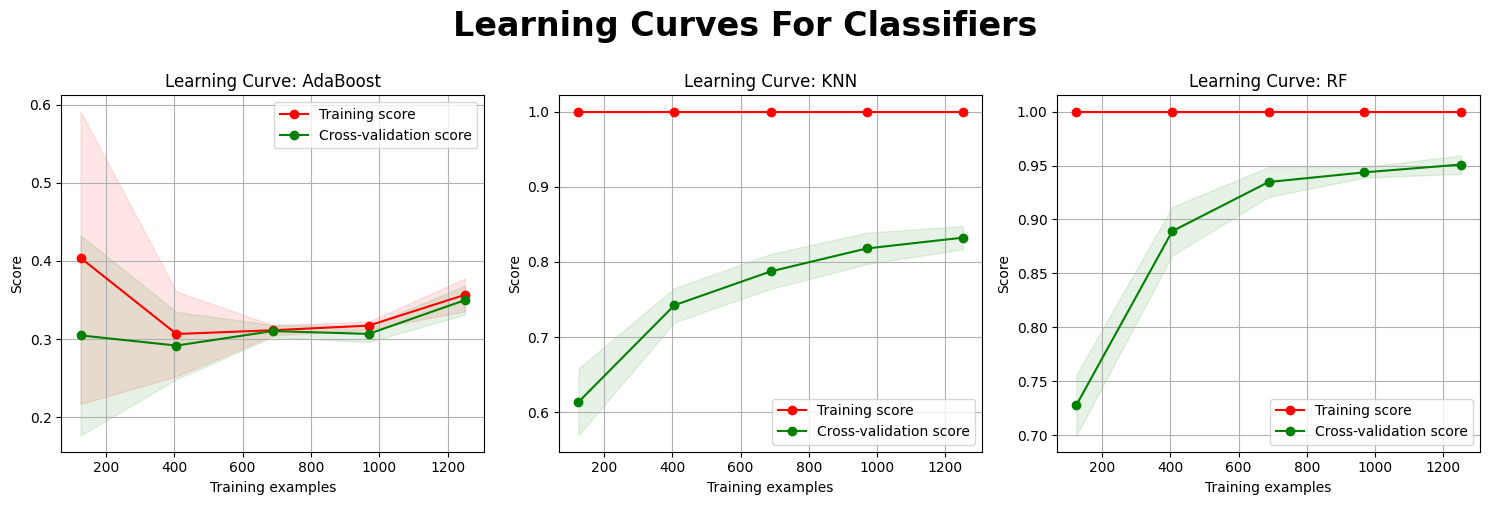

In [32]:
############## LEARNING CURVE #####################


#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.model_selection import learning_curve


############################################

#################################################
from sklearn.model_selection import learning_curve


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Learning Curves For Classifiers', fontsize=24, fontweight='bold', y=1.0)
axes = axes.flatten()
i = 0
###################################################


#for name, clf in {'SVM':svm_model, "AdaBoost":AdaBoost_model, "GBDT":GBDT_model,"KNN":knn_model,"LogReg":lr_model,"RF":RF_model}.items():
model = {"AdaBoost":AdaBoost_model, "KNN":knn_model,"RF":RF_model}


for name, clf in model.items():
    print("\nFor ",name)
    #parameters = param_grid[name]
    #gs = grid_search(clf,parameters)
    
    ax = axes[i]
    i +=1
   
    # split dataset into training and test data
    train_sizes, train_scores, test_scores = learning_curve(clf.best_estimator_, X_train, y_train,
                                                            cv=4,
                                                            verbose=0,
                                                            random_state= 2023,
                                                            #scoring=scoring,
                                                            train_sizes=np.linspace(0.1, 1.0, 5),
                                                           )
    
    # calculate mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # plot learning curve
    #plt.figure()
    ax.set_title(f'Learning Curve: {name}')
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    ax.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    ax.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    
    ax.legend(loc='best')

plt.tight_layout()    
    
#if not os.path.exists('../Results/Results_Classification/LearningCurve_raw4_3_without_month'):
#    os.makedirs('../Results/Results_Classification/LearningCurve_raw4_3_without_month')

os.makedirs(f"Results/LearningCurve_resampled", exist_ok=True)
plt.savefig(f'Results/LearningCurve_resampled/LearningCurve.svg',format='svg',dpi=500)
    
plt.show()

    
    



# Complexity Aanalysis


For  AdaBoost

For  KNN

For  RF


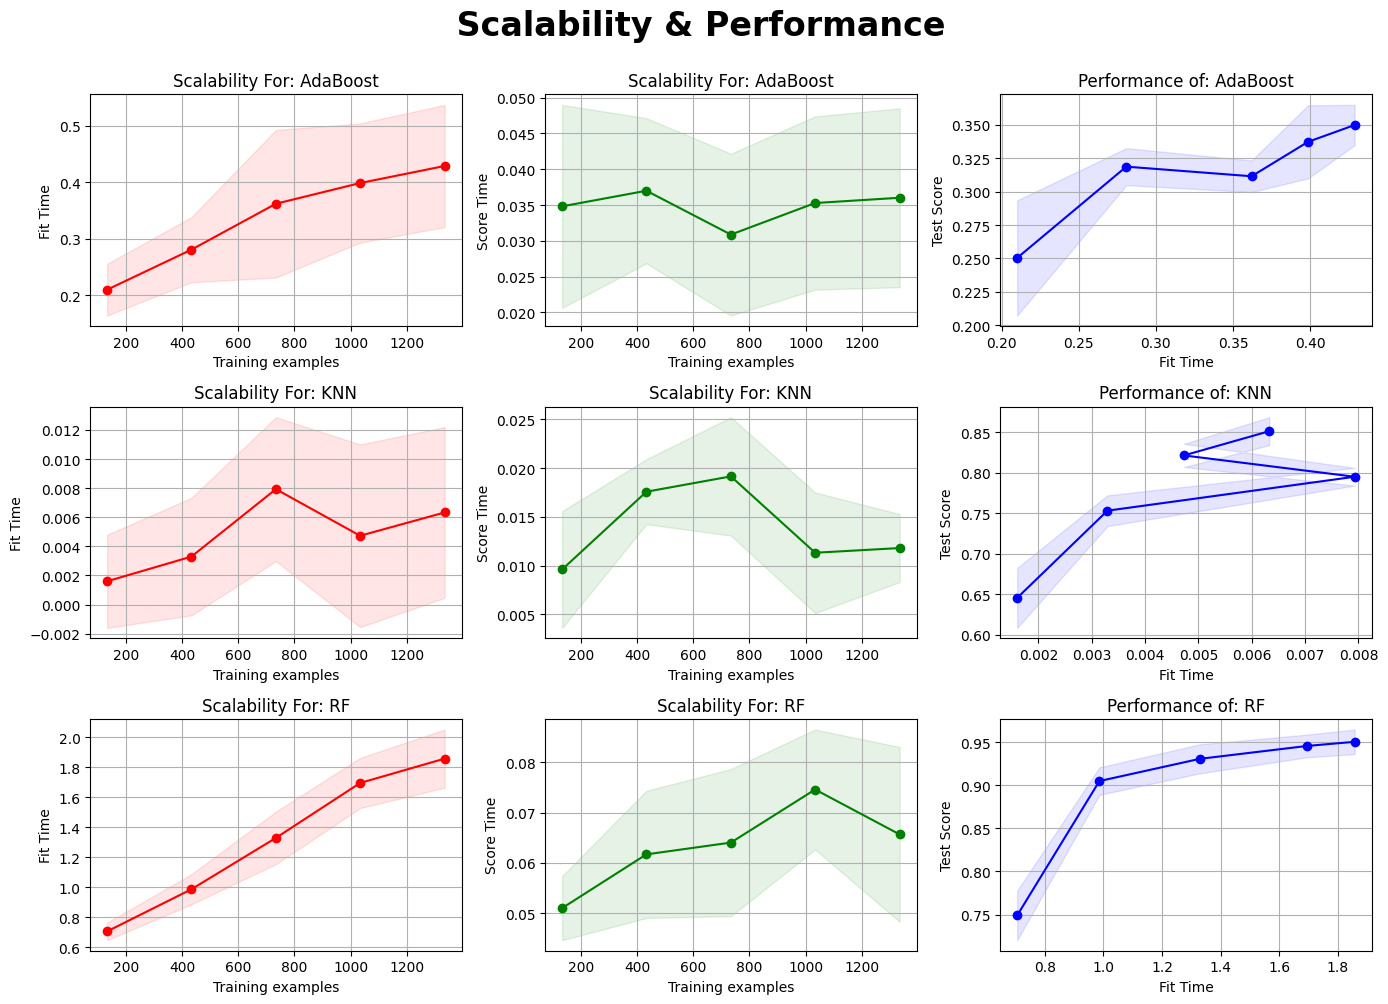

In [36]:
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.model_selection import learning_curve


############################################

#################################################
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
fig.suptitle(' Scalability & Performance', fontsize=24, fontweight='bold', y=1.0)
axes = axes.flatten()
i = 0
###################################################


#for name, clf in {'SVM':svm_model, "AdaBoost":AdaBoost_model, "GBDT":GBDT_model,"KNN":knn_model,"LogReg":lr_model,"RF":RF_model}.items():
model = {"AdaBoost":AdaBoost_model,"KNN":knn_model,"RF":RF_model}


for name, clf in model.items():
    print("\nFor ",name)
    
    ax = axes[i]
    ax2 = axes[i+1]
    ax3 = axes[i+2]
    i +=3
   
    # split dataset into training and test data
    train_sizes, train_scores, test_scores, fit_time, score_time = learning_curve(clf.best_estimator_, X_train, y_train,
                                                            cv=5,
                                                            verbose=0,
                                                            random_state=2023,
                                                            #scoring=scoring,
                                                            train_sizes=np.linspace(0.1, 1.0, 5),
                                                           return_times=True)
    
    # calculate mean and standard deviation of training and test scores
    fit_time_mean = np.mean(fit_time, axis=1)
    fit_time_std = np.std(fit_time, axis=1)
    
    score_time_mean = np.mean(score_time, axis=1)
    score_time_std = np.std(score_time, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    

    # plot learning curve
    #plt.figure()
    ax.set_title(f'Scalability For: {name}')
    ax2.set_title(f'Scalability For: {name}')
    ax3.set_title(f'Performance of: {name}')
    
    ax.set_xlabel('Training examples')
    ax2.set_xlabel('Training examples')
    ax3.set_xlabel('Fit Time')
    
    ax.set_ylabel('Fit Time')
    ax2.set_ylabel('Score Time')
    ax3.set_ylabel('Test Score')
    
    ax.grid()
    ax2.grid()
    ax3.grid()
    
    ax.fill_between(train_sizes, fit_time_mean - fit_time_std, fit_time_mean + fit_time_std, alpha=0.1, color='r')
    ax2.fill_between(train_sizes, score_time_mean - score_time_std, score_time_mean + score_time_std, alpha=0.1, color='g')
    ax3.fill_between(fit_time_mean, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='b')
    
    ax.plot(train_sizes, fit_time_mean, 'o-', color='r', label='Fit Time')
    ax2.plot(train_sizes, score_time_mean, 'o-', color='g', label='Score Time')
    ax3.plot(fit_time_mean, test_scores_mean, 'o-', color='b', label='Fit Time vs score')
    
    #ax.legend(loc='best')
    #ax2.legend(loc='best')

plt.tight_layout()    
    
#if not os.path.exists('Results/Results_Classification_resampled/ScalabilityPerformance_resampled'):
#    os.makedirs('Results/Results_Classification_resampled/ScalabilityPerformance_resampled')

os.makedirs(f'Results/ScalabilityPerformance_resampled', exist_ok=True)
plt.savefig(f'Results/ScalabilityPerformance_resampled/ScalabilityPerformance_resampled.svg',format='svg',dpi=600)
    
plt.show()

    
    



# ROC UC Curve

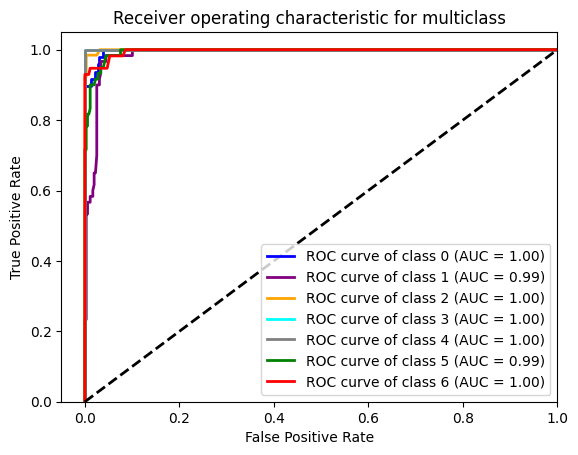

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


# Compute the predicted probabilities for each class
y_score = RF_model.predict_proba(X_test)

# Compute the ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure()
lw = 2
colors = ['blue',"purple", 'orange',"cyan","gray",'green','red']
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclass')
plt.legend(loc="lower right")


#######################################

os.makedirs(f'Results/ROC_AUC_OVR_Curve', exist_ok=True)
plt.savefig(f'Results/ROC_AUC_OVR_Curve/ROC_AUC_OVR_Curve.svg',format='svg',dpi=600)

##########################
plt.show()

# Confusion Metrix

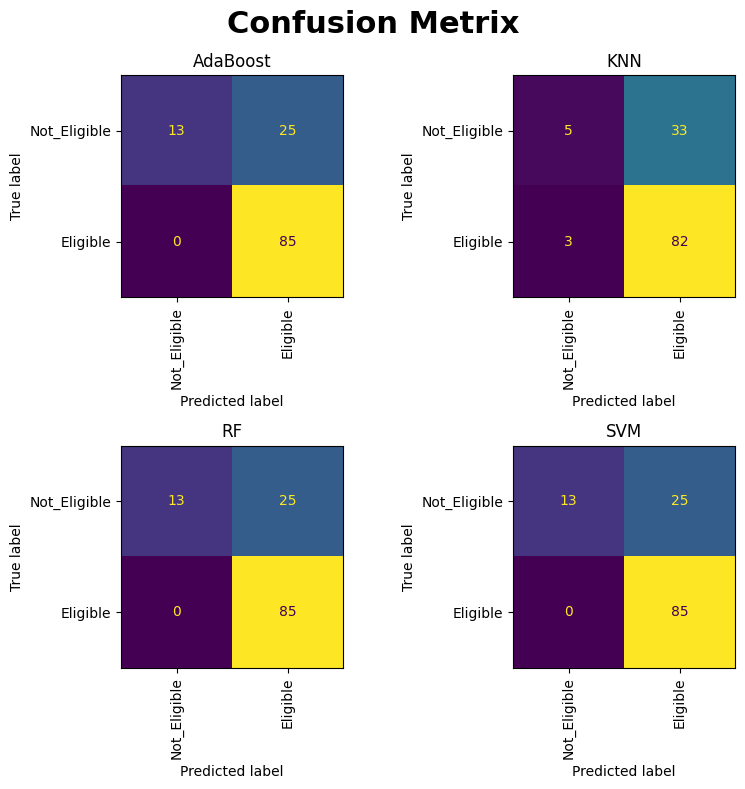

In [44]:
#################################################
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), squeeze=True)
fig.suptitle('Confusion Metrix', fontsize=22, fontweight='bold')
axes = axes.flatten()
i = 0
###################################################

#for name, clf in {'SVM':svm_model, "AdaBoost":AdaBoost_model, "GBDT":GBDT_model,"KNN":knn_model,"LogReg":lr_model,"RF":RF_model}.items():

model = {"AdaBoost":AdaBoost_model,"KNN":knn_model,"RF":RF_model, "SVM":svm_model}

class_names = ['Not_Eligible','Eligible']

for name, clf in model.items():
    #print("\nFor ",name)
    
    ax = axes[i]
    
    confusionMetrix = ConfusionMatrixDisplay.from_estimator(clf.best_estimator_, X=X_test, y= y_test,display_labels= class_names, xticks_rotation='vertical', ax=ax, colorbar=False)
    ax.set_title(name)
    
    i +=1

plt.tight_layout()    

#################################

os.makedirs("artifact/Results/ConfusionMetrix", exist_ok=True)

#if not os.path.exists('../Results/Results_Classification/ConfusionMetrix_raw4_3'):
#    os.makedirs('../Results/Results_Classification/ConfusionMetrix_raw4_3')

plt.savefig(f'artifact/Results/ConfusionMetrix/ConfusionMetrix_scaled.svg',format='svg',dpi=600)
########
plt.show()